In [1]:
from neurons import *
from som import *
from learningrate import *
from neighborhood import *
from visualization import *
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
df = pd.read_csv('../../inputs/well/sint02/1/training_data.csv')
logs = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
data = df[logs][0:1000].values
normalized_data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
normalized_data

array([[ 0.28889162,  0.09941482,  0.7986076 , -0.25903418,  0.94518681],
       [ 0.31377155,  0.08660473,  1.54124134, -0.17241984,  0.41034595],
       [ 0.33803716,  0.07379465,  1.64486465, -0.10779221, -0.12449491],
       ...,
       [ 3.92689033,  0.68440883,  0.47046711, -0.31433411, -0.01752673],
       [ 3.78344678,  0.7228391 ,  0.52227876, -0.34764731, -0.12449491],
       [ 3.3647882 ,  0.76553939,  0.29776159, -0.55418921, -0.12449491]])

In [3]:
nx,ny = 30,30
startLearningRate = 2.0
endLearningRate = 0.5
maxradius = 0.5
minradius = 0.1

In [4]:
neurons = neurons_factory_builder(nx,ny)
learrning = ExponentialLearningRate(startLearningRate,endLearningRate,10000)

In [5]:
neighborhood = GaussianNeighborhoodFunction(0.5,0.1,10000)
som = SelfOrganizingMaps( neurons, learrning, neighborhood, normalized_data )

In [6]:
som.fit( normalized_data )

Iteration 0 - sqerror : 1.3155793 - step: 1000
Iteration 1 - sqerror : 0.7574384 - step: 2000
Iteration 2 - sqerror : 1.2024534 - step: 3000
Iteration 3 - sqerror : 1.7601046 - step: 4000
Iteration 4 - sqerror : 1.3650113 - step: 5000
Iteration 5 - sqerror : 1.0136378 - step: 6000
Iteration 6 - sqerror : 0.9199608 - step: 7000
Iteration 7 - sqerror : 1.4417560 - step: 8000
Iteration 8 - sqerror : 0.8366282 - step: 9000
Iteration 9 - sqerror : 0.2358500 - step: 10000
Iteration 10 - sqerror : 0.2652528 - step: 11000
Iteration 11 - sqerror : 0.0862462 - step: 12000
Iteration 12 - sqerror : 0.0277977 - step: 13000
Iteration 13 - sqerror : 0.6181621 - step: 14000
Iteration 14 - sqerror : 0.2368955 - step: 15000
Iteration 15 - sqerror : 0.1022659 - step: 16000
Iteration 16 - sqerror : 0.2496839 - step: 17000
Iteration 17 - sqerror : 0.1403589 - step: 18000
Iteration 18 - sqerror : 0.0542482 - step: 19000
Iteration 19 - sqerror : 0.0604588 - step: 20000
Iteration 20 - sqerror : 0.0000006 - st

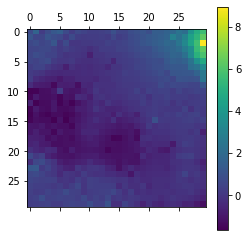

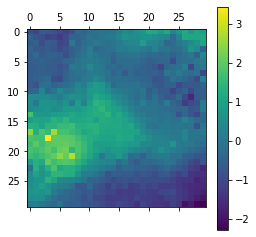

In [11]:
plt.matshow(som.neurons.positions[:,0].reshape(ny,nx))
plt.colorbar()
plt.matshow(som.neurons.positions[:,1].reshape(ny,nx))
plt.colorbar();

In [ ]:
neurons = neurons_factory_builder(nx,ny, grid = 'hexagonal', init='random')
learrning = ExponentialLearningRate(startLearningRate,endLearningRate,10000)

In [ ]:
learrning.max_steps

In [ ]:
learrning.calc_parameters()

In [ ]:
learrning.calc_learning_rate(10)

In [ ]:
learrning(1000000000000)

In [ ]:
neighborhood = GaussianNeighborhoodFunction(0.5,0.1,10000)
som = SelfOrganizingMaps( neurons, learrning, neighborhood, normalized_data )

In [ ]:
learrning.max_steps

In [ ]:
learrning.calc_learning_rate(10000000)

In [ ]:
learrning.max_steps

In [ ]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(151)
plt.title(logs[0])
display_hexgrid(ax1, nx, ny, som.neurons.positions[:,0], "hsv")


ax2 = plt.subplot(152)
plt.title(logs[1])
display_hexgrid(ax2, nx, ny, som.neurons.positions[:,1], "hsv")


ax3 = plt.subplot(153)
plt.title(logs[2])
display_hexgrid(ax3, nx, ny, som.neurons.positions[:,2], "hsv")


ax4 = plt.subplot(154)
plt.title(logs[3])
display_hexgrid(ax4, nx, ny, som.neurons.positions[:,3], "hsv")


ax5 = plt.subplot(155)
plt.title(logs[4])
display_hexgrid(ax5, nx, ny, som.neurons.positions[:,4], "hsv")

plt.show()

In [ ]:
plt.figure( figsize=(20,10) )

plt.subplot( 141 )
plt.title( str( logs[ 0 ] ) + " VS " + str( logs[ 1 ] ) )
plt.scatter( normalized_data[:,0], normalized_data[:,1] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,0], som.neurons.positions[:,1], color = 'green', label = 'Neurons')
plt.legend()

plt.subplot( 142 )
plt.title( str( logs[ 1 ] ) + " VS " + str( logs[ 2 ] ) )
plt.scatter( normalized_data[:,1], normalized_data[:,2] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,1], som.neurons.positions[:,2], color = 'green', label = 'Neurons')
plt.legend( )

plt.subplot( 143 )
plt.title( str( logs[ 2 ] ) + " VS " + str( logs[ 3 ] ) )
plt.scatter( normalized_data[:,2], normalized_data[:,3] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,2], som.neurons.positions[:,3], color = 'green', label = 'Neurons')
plt.legend( )

plt.subplot( 144 )
plt.title( str( logs[ 3 ] ) + " VS " + str( logs[ 4 ] ) )
plt.scatter( normalized_data[:,3], normalized_data[:,4] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,3], som.neurons.positions[:,4], color = 'green', label = 'Neurons')
plt.legend( )

plt.show( )

In [ ]:
ax = plt.subplot(111)
display_hexgrid(ax, nx,ny, som.neurons.lattent_space[:,0] + som.neurons.lattent_space[:,1],'hsv')

In [ ]:
som.fit( normalized_data )

In [ ]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(151)
plt.title(logs[0])
display_hexgrid(ax1, nx, ny, som.neurons.positions[:,0], "hsv")


ax2 = plt.subplot(152)
plt.title(logs[1])
display_hexgrid(ax2, nx, ny, som.neurons.positions[:,1], "hsv")


ax3 = plt.subplot(153)
plt.title(logs[2])
display_hexgrid(ax3, nx, ny, som.neurons.positions[:,2], "hsv")


ax4 = plt.subplot(154)
plt.title(logs[3])
display_hexgrid(ax4, nx, ny, som.neurons.positions[:,3], "hsv")


ax5 = plt.subplot(155)
plt.title(logs[4])
display_hexgrid(ax5, nx, ny, som.neurons.positions[:,4], "hsv")

plt.show()

In [ ]:
plt.figure( figsize=(20,10) )

plt.subplot( 141 )
plt.title( str( logs[ 0 ] ) + " VS " + str( logs[ 1 ] ) )
plt.scatter( normalized_data[:,0], normalized_data[:,1] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,0], som.neurons.positions[:,1], color = 'green', label = 'Neurons')
plt.legend()

plt.subplot( 142 )
plt.title( str( logs[ 1 ] ) + " VS " + str( logs[ 2 ] ) )
plt.scatter( normalized_data[:,1], normalized_data[:,2] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,1], som.neurons.positions[:,2], color = 'green', label = 'Neurons')
plt.legend( )

plt.subplot( 143 )
plt.title( str( logs[ 2 ] ) + " VS " + str( logs[ 3 ] ) )
plt.scatter( normalized_data[:,2], normalized_data[:,3] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,2], som.neurons.positions[:,3], color = 'green', label = 'Neurons')
plt.legend( )

plt.subplot( 144 )
plt.title( str( logs[ 3 ] ) + " VS " + str( logs[ 4 ] ) )
plt.scatter( normalized_data[:,3], normalized_data[:,4] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,3], som.neurons.positions[:,4], color = 'green', label = 'Neurons')
plt.legend( )

plt.show( )

In [ ]:
plt.figure(figsize=(10,10))

plt.title('UX MATRIX')
ax = plt.subplot(111)
display_hexgrid(ax, nx, ny, som.neurons.positions[:,0]  + som.neurons.positions[:,1] + som.neurons.positions[:,2]\
                 + som.neurons.positions[:,3] + som.neurons.positions[:,4], "hsv")


plt.show()

In [ ]:
ax = plt.subplot(111)
display_hexgrid(ax, nx,ny, som.neurons.lattent_space[:,0] + som.neurons.lattent_space[:,1],'hsv')

<h1> OUTRO TESTE: </h1>

In [ ]:
df = pd.read_csv('data/training_data.csv')
logs = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
data = df[logs].values
normalized_data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
tdata1 = np.r_[ (-normalized_data[:,3] - 10), normalized_data[:,0] ]
tdata2 = np.r_[ -normalized_data[:,4] , normalized_data[:,1] ]
testdata = np.c_[tdata1, tdata2]

In [ ]:
nx,ny = 9,9
startLearningRate = 4.0
endLearningRate = 1.0
maxradius = 0.5
minradius = 0.1

In [ ]:
neurons = neurons_factory_builder(nx,ny, init='random')
learrning = LinearLearningRate(startLearningRate,endLearningRate,1000000)
neighborhood = GaussianNeighborhoodFunction(0.5,0.1,1000000)
som = SelfOrganizingMaps( neurons, learrning, neighborhood, testdata )


In [ ]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(121)
plt.title(logs[0])
display_rectgrid(ax1, nx, ny, som.neurons.positions[:,0], "hsv")


ax2 = plt.subplot(122)
plt.title(logs[1])
display_rectgrid(ax2, nx, ny, som.neurons.positions[:,1], "hsv")


plt.show()

In [ ]:
plt.figure( figsize=(12,10) )

plt.title( str( logs[ 0 ] ) + " VS " + str( logs[ 1 ] ) )
plt.scatter( testdata[:,0], testdata[:,1] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,0], som.neurons.positions[:,1], color = 'green', label = 'Neurons')
plt.legend()


plt.show( )

In [ ]:
som.fit( testdata )

In [ ]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(121)
plt.title(logs[0])
display_rectgrid(ax1, nx, ny, som.neurons.positions[:,0], "hsv")


ax2 = plt.subplot(122)
plt.title(logs[1])
display_rectgrid(ax2, nx, ny, som.neurons.positions[:,1], "hsv")


plt.show()

In [ ]:
plt.figure( figsize=(10,10) )

plt.title( str( logs[ 0 ] ) + " VS " + str( logs[ 1 ] ) )
plt.scatter( testdata[:,0], testdata[:,1] , color = 'blue', label = 'Data')
plt.scatter( som.neurons.positions[:,0], som.neurons.positions[:,1], color = 'green', label = 'Neurons')
plt.legend()


plt.show( )

In [ ]:
plt.figure(figsize=(10,10))

plt.title(logs[1])
ax = plt.subplot(111)
display_rectgrid(ax, nx, ny, som.neurons.positions[:,1] + som.neurons.positions[:,0], "hsv")


plt.show()